# Libraties + config

In [10]:
import sys
import os

import numpy as np 
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)


In [18]:
from importlib import reload

import neuralnetwork.neuralNetwork as neuralnetwork
import activations.elu as elu
import activations.gelu as gelu
import activations.identity as identity
import activations.lrelu as lrelu
import activations.relu as relu
import activations.sigmoid as sigmoid
import activations.tanh as tanh

import plot_utils.plot_utils as plot

# updates changes
reload(neuralnetwork), reload(elu), reload(gelu), reload(identity), reload(lrelu), reload(relu), reload(sigmoid), reload(tanh), reload(plot)

from neuralnetwork.neuralNetwork import NeuralNetWork
from activations.elu import ELU
from activations.gelu import GELU
from activations.identity import Identity
from activations.lrelu import LReLU
from activations.relu import ReLU
from activations.sigmoid import Sigmoid
from activations.tanh import Tanh

from plot_utils.plot_utils import plot_af

In [13]:
import plot_utils.plot_utils as pu  # Alias opcional


# Implemetation of the Neural Network

## Activation functions

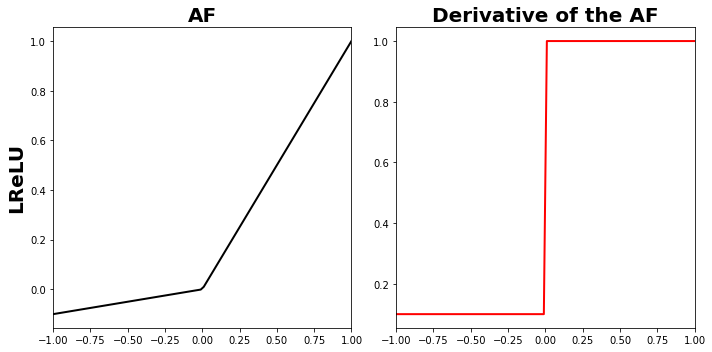

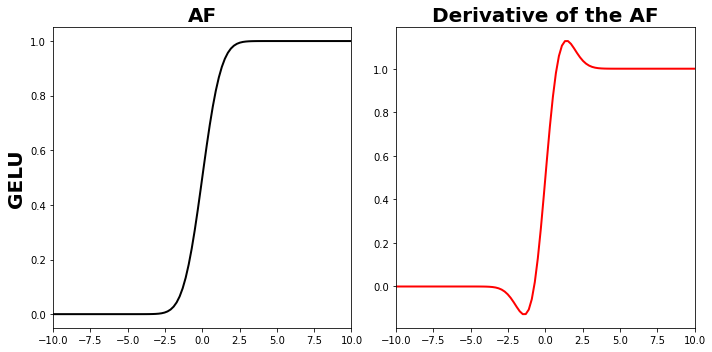

In [31]:
act_lrelu = LReLU(a=0.1)
act_gelu = GELU()

plot_af(x=np.linspace(-1,1, 100), af=act_lrelu.act, daf=act_lrelu.dadz, af_ylabel="LReLU", daf_ylabel="")
plot_af(x=np.linspace(-10,10, 100), af=act_gelu.act, daf=act_gelu.dadz, af_ylabel="GELU", daf_ylabel="")